In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('data/ind - agridata.csv')
pd.options.display.max_columns = None
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),KHARIF SORGHUM PRODUCTION (1000 tons),KHARIF SORGHUM YIELD (Kg per ha),RABI SORGHUM AREA (1000 ha),RABI SORGHUM PRODUCTION (1000 tons),RABI SORGHUM YIELD (Kg per ha),SORGHUM AREA (1000 ha),SORGHUM PRODUCTION (1000 tons),SORGHUM YIELD (Kg per ha),PEARL MILLET AREA (1000 ha),PEARL MILLET PRODUCTION (1000 tons),PEARL MILLET YIELD (Kg per ha),MAIZE AREA (1000 ha),MAIZE PRODUCTION (1000 tons),MAIZE YIELD (Kg per ha),FINGER MILLET AREA (1000 ha),FINGER MILLET PRODUCTION (1000 tons),FINGER MILLET YIELD (Kg per ha),BARLEY AREA (1000 ha),BARLEY PRODUCTION (1000 tons),BARLEY YIELD (Kg per ha),CHICKPEA AREA (1000 ha),CHICKPEA PRODUCTION (1000 tons),CHICKPEA YIELD (Kg per ha),PIGEONPEA AREA (1000 ha),PIGEONPEA PRODUCTION (1000 tons),PIGEONPEA YIELD (Kg per ha),MINOR PULSES AREA (1000 ha),MINOR PULSES PRODUCTION (1000 tons),MINOR PULSES YIELD (Kg per ha),GROUNDNUT AREA (1000 ha),GROUNDNUT PRODUCTION (1000 tons),GROUNDNUT YIELD (Kg per ha),SESAMUM AREA (1000 ha),SESAMUM PRODUCTION (1000 tons),SESAMUM YIELD (Kg per ha),RAPESEED AND MUSTARD AREA (1000 ha),RAPESEED AND MUSTARD PRODUCTION (1000 tons),RAPESEED AND MUSTARD YIELD (Kg per ha),SAFFLOWER AREA (1000 ha),SAFFLOWER PRODUCTION (1000 tons),SAFFLOWER YIELD (Kg per ha),CASTOR AREA (1000 ha),CASTOR PRODUCTION (1000 tons),CASTOR YIELD (Kg per ha),LINSEED AREA (1000 ha),LINSEED PRODUCTION (1000 tons),LINSEED YIELD (Kg per ha),SUNFLOWER AREA (1000 ha),SUNFLOWER PRODUCTION (1000 tons),SUNFLOWER YIELD (Kg per ha),SOYABEAN AREA (1000 ha),SOYABEAN PRODUCTION (1000 tons),SOYABEAN YIELD (Kg per ha),OILSEEDS AREA (1000 ha),OILSEEDS PRODUCTION (1000 tons),OILSEEDS YIELD (Kg per ha),SUGARCANE AREA (1000 ha),SUGARCANE PRODUCTION (1000 tons),SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,454.55,0.6,0.4,666.67,0.0,0.0,0.0,0.6,0.4,666.67,0.0,0.0,0.0,3.0,2.0,666.67,0.8,0.2,250.00,0.1,0.0,0.0,54.0,27.0,500.00,37.0,15.0,405.41,114.96,-1.0,-1.00,0.2,0.1,500.0,3.0,0.3,100.00,1.0,0.2,200.00,0.07,0.0,0.0,0.7,0.2,285.71,45.7,6.8,148.80,0.0,0.0,0.0,0.0,0.0,0.0,50.70,-1.0,-1.00,0.9,1.6,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,520.00,1.1,0.9,818.18,0.0,0.0,0.0,1.1,0.9,818.18,0.0,0.0,0.0,3.0,3.0,1000.00,0.9,0.2,222.22,0.2,0.1,500.0,52.0,15.0,288.46,36.0,26.0,722.22,269.54,-1.0,-1.00,0.1,0.1,1000.0,11.6,0.9,77.59,1.1,0.3,272.73,0.01,0.0,0.0,0.5,0.1,200.00,100.1,25.8,257.74,0.0,0.0,0.0,0.0,0.0,0.0,113.55,-1.0,-1.00,0.8,1.2,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,558.66,0.5,0.4,800.00,0.0,0.0,0.0,0.5,0.4,800.00,0.0,0.0,0.0,2.8,2.0,714.29,0.8,0.2,250.00,0.2,0.1,500.0,51.3,23.0,448.34,35.7,28.0,784.31,289.46,-1.0,-1.00,0.1,0.1,1000.0,11.3,1.6,141.59,1.2,0.5,416.67,0.02,0.0,0.0,0.6,0.3,500.00,113.3,23.8,210.06,0.0,0.0,0.0,0.0,0.0,0.0,126.62,-1.0,-1.00,1.0,1.0,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,536.44,0.8,0.6,750.00,0.0,0.0,0.0,0.8,0.6,750.00,0.0,0.0,0.0,2.7,2.3,851.85,0.8,0.2,250.00,0.2,0.1,500.0,52.6,23.1,439.16,35.7,27.3,764.71,298.18,98.3,329.67,0.1,0.1,1000.0,11.4,1.4,122.81,1.2,0.4,333.33,0.02,0.0,0.0,0.5,0.1,200.00,101.1,13.0,128.59,0.0,0.0,0.0,0.0,0.0,0.0,114.14,14.9,130.54,1.0,1.9,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,656.11,0.9,0.6,666.67,0.0,0.0,0.0,0.9,0.6,666.67,0.0,0.0,0.0,2.5,3.3,1320.00,0.8,0.2,250.00,0.1,0.1,1000.0,53.3,32.6,611.63,33.3,35.2,1057

In [5]:
df.columns

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

In [6]:
def to_pascal_snake_case(col):
    
    # Remove parentheses and extra characters
    col = col.replace("(", "").replace(")", "")
    
    # Split on underscores/spaces
    words = col.replace("_", " ").split()
    
    # Capitalize first letter of each word and join with underscore
    return "_".join(word.capitalize() for word in words)

# Apply the transformation
df.columns = [to_pascal_snake_case(col) for col in df.columns]

# Display updated column names
print(df.columns)


Index(['Dist_Code', 'Year', 'State_Code', 'State_Name', 'Dist_Name',
       'Rice_Area_1000_Ha', 'Rice_Production_1000_Tons',
       'Rice_Yield_Kg_Per_Ha', 'Wheat_Area_1000_Ha',
       'Wheat_Production_1000_Tons', 'Wheat_Yield_Kg_Per_Ha',
       'Kharif_Sorghum_Area_1000_Ha', 'Kharif_Sorghum_Production_1000_Tons',
       'Kharif_Sorghum_Yield_Kg_Per_Ha', 'Rabi_Sorghum_Area_1000_Ha',
       'Rabi_Sorghum_Production_1000_Tons', 'Rabi_Sorghum_Yield_Kg_Per_Ha',
       'Sorghum_Area_1000_Ha', 'Sorghum_Production_1000_Tons',
       'Sorghum_Yield_Kg_Per_Ha', 'Pearl_Millet_Area_1000_Ha',
       'Pearl_Millet_Production_1000_Tons', 'Pearl_Millet_Yield_Kg_Per_Ha',
       'Maize_Area_1000_Ha', 'Maize_Production_1000_Tons',
       'Maize_Yield_Kg_Per_Ha', 'Finger_Millet_Area_1000_Ha',
       'Finger_Millet_Production_1000_Tons', 'Finger_Millet_Yield_Kg_Per_Ha',
       'Barley_Area_1000_Ha', 'Barley_Production_1000_Tons',
       'Barley_Yield_Kg_Per_Ha', 'Chickpea_Area_1000_Ha',
       'Chickpea

In [7]:
df.head()

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Rice_Area_1000_Ha,Rice_Production_1000_Tons,Rice_Yield_Kg_Per_Ha,Wheat_Area_1000_Ha,Wheat_Production_1000_Tons,Wheat_Yield_Kg_Per_Ha,Kharif_Sorghum_Area_1000_Ha,Kharif_Sorghum_Production_1000_Tons,Kharif_Sorghum_Yield_Kg_Per_Ha,Rabi_Sorghum_Area_1000_Ha,Rabi_Sorghum_Production_1000_Tons,Rabi_Sorghum_Yield_Kg_Per_Ha,Sorghum_Area_1000_Ha,Sorghum_Production_1000_Tons,Sorghum_Yield_Kg_Per_Ha,Pearl_Millet_Area_1000_Ha,Pearl_Millet_Production_1000_Tons,Pearl_Millet_Yield_Kg_Per_Ha,Maize_Area_1000_Ha,Maize_Production_1000_Tons,Maize_Yield_Kg_Per_Ha,Finger_Millet_Area_1000_Ha,Finger_Millet_Production_1000_Tons,Finger_Millet_Yield_Kg_Per_Ha,Barley_Area_1000_Ha,Barley_Production_1000_Tons,Barley_Yield_Kg_Per_Ha,Chickpea_Area_1000_Ha,Chickpea_Production_1000_Tons,Chickpea_Yield_Kg_Per_Ha,Pigeonpea_Area_1000_Ha,Pigeonpea_Production_1000_Tons,Pigeonpea_Yield_Kg_Per_Ha,Minor_Pulses_Area_1000_Ha,Minor_Pulses_Production_1000_Tons,Minor_Pulses_Yield_Kg_Per_Ha,Groundnut_Area_1000_Ha,Groundnut_Production_1000_Tons,Groundnut_Yield_Kg_Per_Ha,Sesamum_Area_1000_Ha,Sesamum_Production_1000_Tons,Sesamum_Yield_Kg_Per_Ha,Rapeseed_And_Mustard_Area_1000_Ha,Rapeseed_And_Mustard_Production_1000_Tons,Rapeseed_And_Mustard_Yield_Kg_Per_Ha,Safflower_Area_1000_Ha,Safflower_Production_1000_Tons,Safflower_Yield_Kg_Per_Ha,Castor_Area_1000_Ha,Castor_Production_1000_Tons,Castor_Yield_Kg_Per_Ha,Linseed_Area_1000_Ha,Linseed_Production_1000_Tons,Linseed_Yield_Kg_Per_Ha,Sunflower_Area_1000_Ha,Sunflower_Production_1000_Tons,Sunflower_Yield_Kg_Per_Ha,Soyabean_Area_1000_Ha,Soyabean_Production_1000_Tons,Soyabean_Yield_Kg_Per_Ha,Oilseeds_Area_1000_Ha,Oilseeds_Production_1000_Tons,Oilseeds_Yield_Kg_Per_Ha,Sugarcane_Area_1000_Ha,Sugarcane_Production_1000_Tons,Sugarcane_Yield_Kg_Per_Ha,Cotton_Area_1000_Ha,Cotton_Production_1000_Tons,Cotton_Yield_Kg_Per_Ha,Fruits_Area_1000_Ha,Vegetables_Area_1000_Ha,Fruits_And_Vegetables_Area_1000_Ha,Potatoes_Area_1000_Ha,Onion_Area_1000_Ha,Fodder_Area_1000_Ha
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,454.55,0.6,0.4,666.67,0.0,0.0,0.0,0.6,0.4,666.67,0.0,0.0,0.0,3.0,2.0,666.67,0.8,0.2,250.00,0.1,0.0,0.0,54.0,27.0,500.00,37.0,15.0,405.41,114.96,-1.0,-1.00,0.2,0.1,500.0,3.0,0.3,100.00,1.0,0.2,200.00,0.07,0.0,0.0,0.7,0.2,285.71,45.7,6.8,148.80,0.0,0.0,0.0,0.0,0.0,0.0,50.70,-1.0,-1.00,0.9,1.6,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,520.00,1.1,0.9,818.18,0.0,0.0,0.0,1.1,0.9,818.18,0.0,0.0,0.0,3.0,3.0,1000.00,0.9,0.2,222.22,0.2,0.1,500.0,52.0,15.0,288.46,36.0,26.0,722.22,269.54,-1.0,-1.00,0.1,0.1,1000.0,11.6,0.9,77.59,1.1,0.3,272.73,0.01,0.0,0.0,0.5,0.1,200.00,100.1,25.8,257.74,0.0,0.0,0.0,0.0,0.0,0.0,113.55,-1.0,-1.00,0.8,1.2,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,558.66,0.5,0.4,800.00,0.0,0.0,0.0,0.5,0.4,800.00,0.0,0.0,0.0,2.8,2.0,714.29,0.8,0.2,250.00,0.2,0.1,500.0,51.3,23.0,448.34,35.7,28.0,784.31,289.46,-1.0,-1.00,0.1,0.1,1000.0,11.3,1.6,141.59,1.2,0.5,416.67,0.02,0.0,0.0,0.6,0.3,500.00,113.3,23.8,210.06,0.0,0.0,0.0,0.0,0.0,0.0,126.62,-1.0,-1.00,1.0,1.0,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,536.44,0.8,0.6,750.00,0.0,0.0,0.0,0.8,0.6,750.00,0.0,0.0,0.0,2.7,2.3,851.85,0.8,0.2,250.00,0.2,0.1,500.0,52.6,23.1,439.16,35.7,27.3,764.71,298.18,98.3,329.67,0.1,0.1,1000.0,11.4,1.4,122.81,1.2,0.4,333.33,0.02,0.0,0.0,0.5,0.1,200.00,101.1,13.0,128.59,0.0,0.0,0.0,0.0,0.0,0.0,114.14,14.9,130.54,1.0,1.9,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,656.11,0.9,0.6,666.67,0.0,0.0,0.0,0.9,0.6,666.67,0.0,0.0,0.0,2.5,3.3,1320.00,0.8,0.2,250.00,0.1,0.1,1000.0,53.3,32.6,611.63,33.3,35.2,1057.06,342.80,142.9,416.86,0.1,0.1,1000.0,10.8,1.1,101.85,1.1,0.4,363.64,0.02,0.0,0.0,0.4,0.1,250.00,114.1,22.7,198.95,0.0,0.0,0.0,0.0,0.0,0.0,126.40,24.

In [42]:
df.describe()

c:\Users\vigne\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract

c:\Users\vigne\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning:

invalid value encountered in subtract



,Dist_Code,Year,State_Code,Rice_Area_1000_Ha,Rice_Production_1000_Tons,Rice_Yield_Kg_Per_Ha,Wheat_Area_1000_Ha,Wheat_Production_1000_Tons,Wheat_Yield_Kg_Per_Ha,Kharif_Sorghum_Area_1000_Ha,Kharif_Sorghum_Production_1000_Tons,Kharif_Sorghum_Yield_Kg_Per_Ha,Rabi_Sorghum_Area_1000_Ha,Rabi_Sorghum_Production_1000_Tons,Rabi_Sorghum_Yield_Kg_Per_Ha,Sorghum_Area_1000_Ha,Sorghum_Production_1000_Tons,Sorghum_Yield_Kg_Per_Ha,Pearl_Millet_Area_1000_Ha,Pearl_Millet_Production_1000_Tons,Pearl_Millet_Yield_Kg_Per_Ha,Maize_Area_1000_Ha,Maize_Production_1000_Tons,Maize_Yield_Kg_Per_Ha,Finger_Millet_Area_1000_Ha,Finger_Millet_Production_1000_Tons,Finger_Millet_Yield_Kg_Per_Ha,Barley_Area_1000_Ha,Barley_Production_1000_Tons,Barley_Yield_Kg_Per_Ha,Chickpea_Area_1000_Ha,Chickpea_Production_1000_Tons,Chickpea_Yield_Kg_Per_Ha,Pigeonpea_Area_1000_Ha,Pigeonpea_Production_1000_Tons,Pigeonpea_Yield_Kg_Per_Ha,Minor_Pulses_Area_1000_Ha,Minor_Pulses_Production_1000_Tons,Minor_Pulses_Yield_Kg_Per_Ha,Groundnut_Area_1000_Ha,Groundnut_Production_1000_Tons,Groundnut_Yield_Kg_Per_Ha,Sesamum_Area_1000_Ha,Sesamum_Production_1000_Tons,Sesamum_Yield_Kg_Per_Ha,Rapeseed_And_Mustard_Area_1000_Ha,Rapeseed_And_Mustard_Production_1000_Tons,Rapeseed_And_Mustard_Yield_Kg_Per_Ha,Safflower_Area_1000_Ha,Safflower_Production_1000_Tons,Safflower_Yield_Kg_Per_Ha,Castor_Area_1000_Ha,Castor_Production_1000_Tons,Castor_Yield_Kg_Per_Ha,Linseed_Area_1000_Ha,Linseed_Production_1000_Tons,Linseed_Yield_Kg_Per_Ha,Sunflower_Area_1000_Ha,Sunflower_Production_1000_Tons,Sunflower_Yield_Kg_Per_Ha,Soyabean_Area_1000_Ha,Soyabean_Production_1000_Tons,Soyabean_Yield_Kg_Per_Ha,Oilseeds_Area_1000_Ha,Oilseeds_Production_1000_Tons,Oilseeds_Yield_Kg_Per_Ha,Sugarcane_Area_1000_Ha,Sugarcane_Production_1000_Tons,Sugarcane_Yield_Kg_Per_Ha,Cotton_Area_1000_Ha,Cotton_Production_1000_Tons,Cotton_Yield_Kg_Per_Ha,Fruits_Area_1000_Ha,Vegetables_Area_1000_Ha,Fruits_And_Vegetables_Area_1000_Ha,Potatoes_Area_1000_Ha,Onion_Area_1000_Ha,Fodder_Area_1000_Ha,Total_Millet_Production_1000_Tons,Rice_Yield,Wheat_Yield
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,1.506400e+04,1.385200e+04
mean,269.769231,1991.496841,9.568562,128.595917,224.892290,1486.927509,77.062281,182.017081,1492.424194,22.637223,18.363049,586.036028,17.391077,10.008346,225.640718,40.155059,28.466307,586.098516,33.202383,22.128308,517.923782,20.125588,36.056682,1408.766686,6.250237,7.113475,354.851593,4.173916,5.885113,734.248842,23.871294,18.051831,630.823389,10.484344,7.440844,618.024381,41.474092,16.833117,453.808529,22.441127,22.031924,765.948891,6.110009,1.876231,264.734460,12.970723,12.402027,497.955364,1.762363,0.786601,73.108148,2.198981,2.219846,215.415992,2.480654,0.719401,175.579905,3.013894,1.596525,278.454650,13.673751,13.951416,242.965609,66.756994,51.117056,593.866859,11.935580,75.541630,4500.182913,28.020225,7.230464,124.646682,7.793460,11.122048,18.713427,3.181250,1.233870,21.660200,57.708090,inf,inf
std,278.309125,15.011185,4.988538,160.076636,326.627952,956.181043,1

In [8]:
# changing negative values
numeric_df = df.select_dtypes(include=[np.number])
negative = df[(numeric_df < 0).any(axis=1)]
for col in numeric_df.columns:
    if (numeric_df[col] < 0).any():
        df[col] = df[col].abs()
display(df.head())

,Dist_Code,Year,State_Code,State_Name,Dist_Name,Rice_Area_1000_Ha,Rice_Production_1000_Tons,Rice_Yield_Kg_Per_Ha,Wheat_Area_1000_Ha,Wheat_Production_1000_Tons,Wheat_Yield_Kg_Per_Ha,Kharif_Sorghum_Area_1000_Ha,Kharif_Sorghum_Production_1000_Tons,Kharif_Sorghum_Yield_Kg_Per_Ha,Rabi_Sorghum_Area_1000_Ha,Rabi_Sorghum_Production_1000_Tons,Rabi_Sorghum_Yield_Kg_Per_Ha,Sorghum_Area_1000_Ha,Sorghum_Production_1000_Tons,Sorghum_Yield_Kg_Per_Ha,Pearl_Millet_Area_1000_Ha,Pearl_Millet_Production_1000_Tons,Pearl_Millet_Yield_Kg_Per_Ha,Maize_Area_1000_Ha,Maize_Production_1000_Tons,Maize_Yield_Kg_Per_Ha,Finger_Millet_Area_1000_Ha,Finger_Millet_Production_1000_Tons,Finger_Millet_Yield_Kg_Per_Ha,Barley_Area_1000_Ha,Barley_Production_1000_Tons,Barley_Yield_Kg_Per_Ha,Chickpea_Area_1000_Ha,Chickpea_Production_1000_Tons,Chickpea_Yield_Kg_Per_Ha,Pigeonpea_Area_1000_Ha,Pigeonpea_Production_1000_Tons,Pigeonpea_Yield_Kg_Per_Ha,Minor_Pulses_Area_1000_Ha,Minor_Pulses_Production_1000_Tons,Minor_Pulses_Yield_Kg_Per_Ha,Groundnut_Area_1000_Ha,Groundnut_Production_1000_Tons,Groundnut_Yield_Kg_Per_Ha,Sesamum_Area_1000_Ha,Sesamum_Production_1000_Tons,Sesamum_Yield_Kg_Per_Ha,Rapeseed_And_Mustard_Area_1000_Ha,Rapeseed_And_Mustard_Production_1000_Tons,Rapeseed_And_Mustard_Yield_Kg_Per_Ha,Safflower_Area_1000_Ha,Safflower_Production_1000_Tons,Safflower_Yield_Kg_Per_Ha,Castor_Area_1000_Ha,Castor_Production_1000_Tons,Castor_Yield_Kg_Per_Ha,Linseed_Area_1000_Ha,Linseed_Production_1000_Tons,Linseed_Yield_Kg_Per_Ha,Sunflower_Area_1000_Ha,Sunflower_Production_1000_Tons,Sunflower_Yield_Kg_Per_Ha,Soyabean_Area_1000_Ha,Soyabean_Production_1000_Tons,Soyabean_Yield_Kg_Per_Ha,Oilseeds_Area_1000_Ha,Oilseeds_Production_1000_Tons,Oilseeds_Yield_Kg_Per_Ha,Sugarcane_Area_1000_Ha,Sugarcane_Production_1000_Tons,Sugarcane_Yield_Kg_Per_Ha,Cotton_Area_1000_Ha,Cotton_Production_1000_Tons,Cotton_Yield_Kg_Per_Ha,Fruits_Area_1000_Ha,Vegetables_Area_1000_Ha,Fruits_And_Vegetables_Area_1000_Ha,Potatoes_Area_1000_Ha,Onion_Area_1000_Ha,Fodder_Area_1000_Ha
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,454.55,0.6,0.4,666.67,0.0,0.0,0.0,0.6,0.4,666.67,0.0,0.0,0.0,3.0,2.0,666.67,0.8,0.2,250.00,0.1,0.0,0.0,54.0,27.0,500.00,37.0,15.0,405.41,114.96,1.0,1.00,0.2,0.1,500.0,3.0,0.3,100.00,1.0,0.2,200.00,0.07,0.0,0.0,0.7,0.2,285.71,45.7,6.8,148.80,0.0,0.0,0.0,0.0,0.0,0.0,50.70,1.0,1.00,0.9,1.6,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,520.00,1.1,0.9,818.18,0.0,0.0,0.0,1.1,0.9,818.18,0.0,0.0,0.0,3.0,3.0,1000.00,0.9,0.2,222.22,0.2,0.1,500.0,52.0,15.0,288.46,36.0,26.0,722.22,269.54,1.0,1.00,0.1,0.1,1000.0,11.6,0.9,77.59,1.1,0.3,272.73,0.01,0.0,0.0,0.5,0.1,200.00,100.1,25.8,257.74,0.0,0.0,0.0,0.0,0.0,0.0,113.55,1.0,1.00,0.8,1.2,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,558.66,0.5,0.4,800.00,0.0,0.0,0.0,0.5,0.4,800.00,0.0,0.0,0.0,2.8,2.0,714.29,0.8,0.2,250.00,0.2,0.1,500.0,51.3,23.0,448.34,35.7,28.0,784.31,289.46,1.0,1.00,0.1,0.1,1000.0,11.3,1.6,141.59,1.2,0.5,416.67,0.02,0.0,0.0,0.6,0.3,500.00,113.3,23.8,210.06,0.0,0.0,0.0,0.0,0.0,0.0,126.62,1.0,1.00,1.0,1.0,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,536.44,0.8,0.6,750.00,0.0,0.0,0.0,0.8,0.6,750.00,0.0,0.0,0.0,2.7,2.3,851.85,0.8,0.2,250.00,0.2,0.1,500.0,52.6,23.1,439.16,35.7,27.3,764.71,298.18,98.3,329.67,0.1,0.1,1000.0,11.4,1.4,122.81,1.2,0.4,333.33,0.02,0.0,0.0,0.5,0.1,200.00,101.1,13.0,128.59,0.0,0.0,0.0,0.0,0.0,0.0,114.14,14.9,130.54,1.0,1.9,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,656.11,0.9,0.6,666.67,0.0,0.0,0.0,0.9,0.6,666.67,0.0,0.0,0.0,2.5,3.3,1320.00,0.8,0.2,250.00,0.1,0.1,1000.0,53.3,32.6,611.63,33.3,35.2,1057.06,342.80,142.9,416.86,0.1,0.1,1000.0,10.8,1.1,101.85,1.1,0.4,363.64,0.02,0.0,0.0,0.4,0.1,250.00,114.1,22.7,198.95,0.0,0.0,0.0,0.0,0.0,0.0,126.40,24.3,192.25,0.7

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dist_Code                                  16146 non-null  int64  
 1   Year                                       16146 non-null  int64  
 2   State_Code                                 16146 non-null  int64  
 3   State_Name                                 16146 non-null  object 
 4   Dist_Name                                  16146 non-null  object 
 5   Rice_Area_1000_Ha                          16146 non-null  float64
 6   Rice_Production_1000_Tons                  16146 non-null  float64
 7   Rice_Yield_Kg_Per_Ha                       16146 non-null  float64
 8   Wheat_Area_1000_Ha                         16146 non-null  float64
 9   Wheat_Production_1000_Tons                 16146 non-null  float64
 10  Wheat_Yield_Kg_Per_Ha 

In [10]:
cleaned_data = df.to_csv('data/cleaned_agridata.csv', index=False)

**EDA**

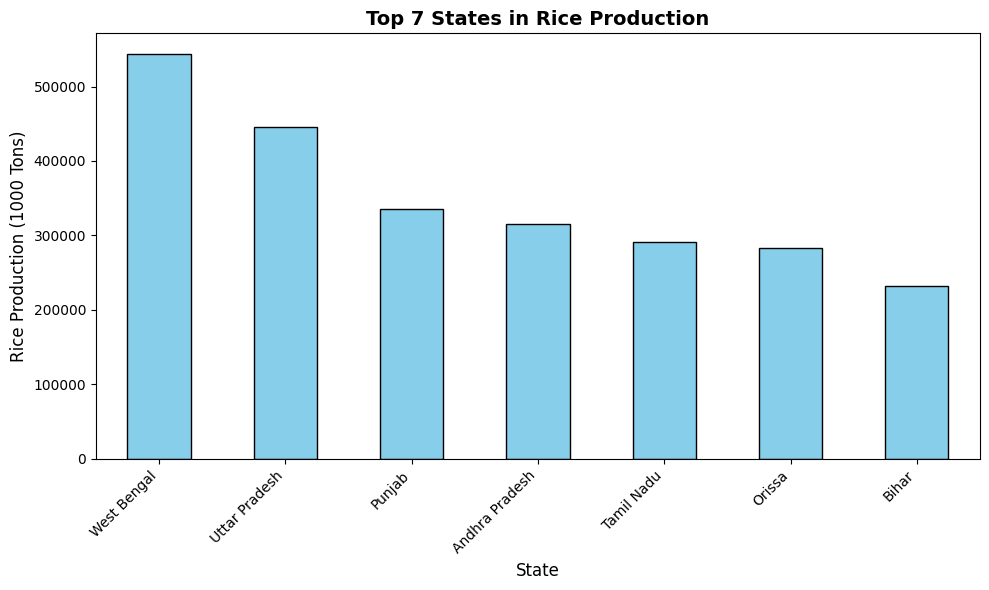

In [44]:
# top 7 rice production states

top_7_state_rice = (
    df.groupby("State_Name")["Rice_Production_1000_Tons"]
    .sum()
    .sort_values(ascending=False)
    .head(7)
)

# Plot bar chart
plt.figure(figsize=(10,6))
top_7_state_rice.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 7 States in Rice Production", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Rice Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


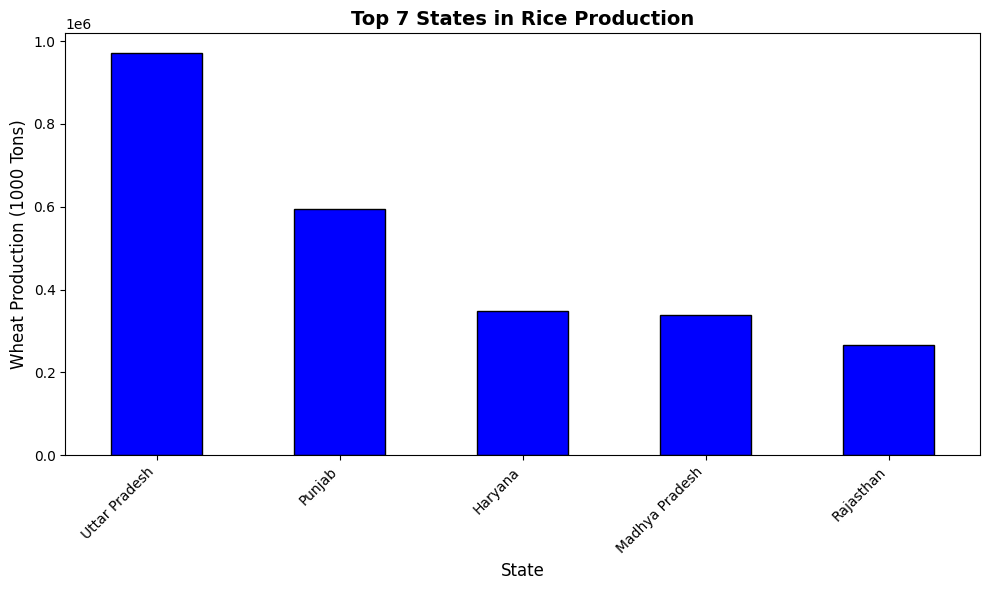

In [11]:
top_5_state_rice = (
    df.groupby("State_Name")["Wheat_Production_1000_Tons"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Plot bar chart
plt.figure(figsize=(10,6))
top_5_state_rice.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Top 7 States in Rice Production", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Wheat Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

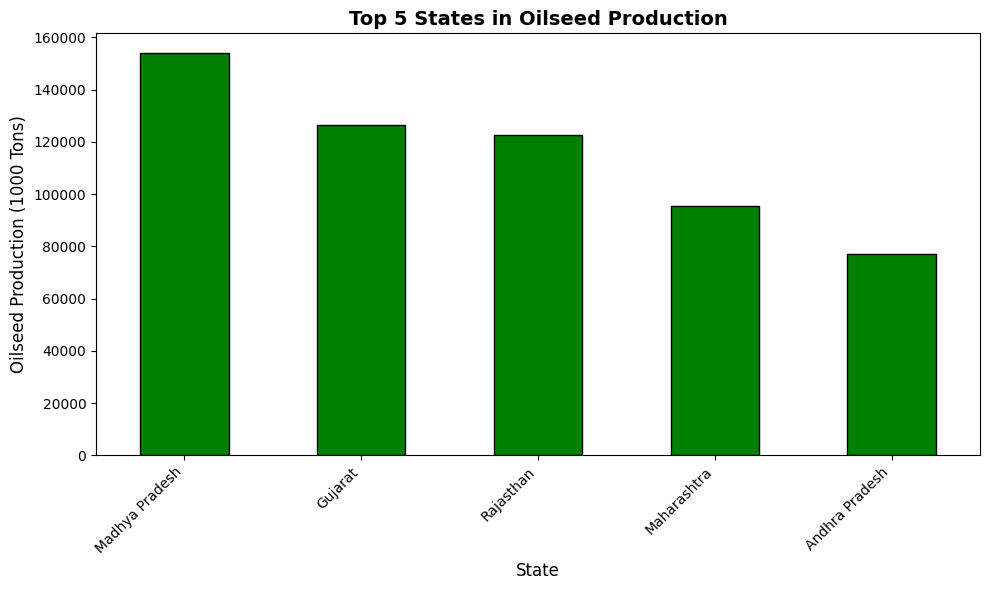

In [51]:
# Oil seed production by top 5 states

Oil_seed_production = (df.groupby("State_Name")["Oilseeds_Production_1000_Tons"]
.sum()
.sort_values(ascending=False)
.head(5))

# Plot bar chart
plt.figure(figsize=(10,6))
Oil_seed_production.plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 5 States in Oilseed Production", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Oilseed Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

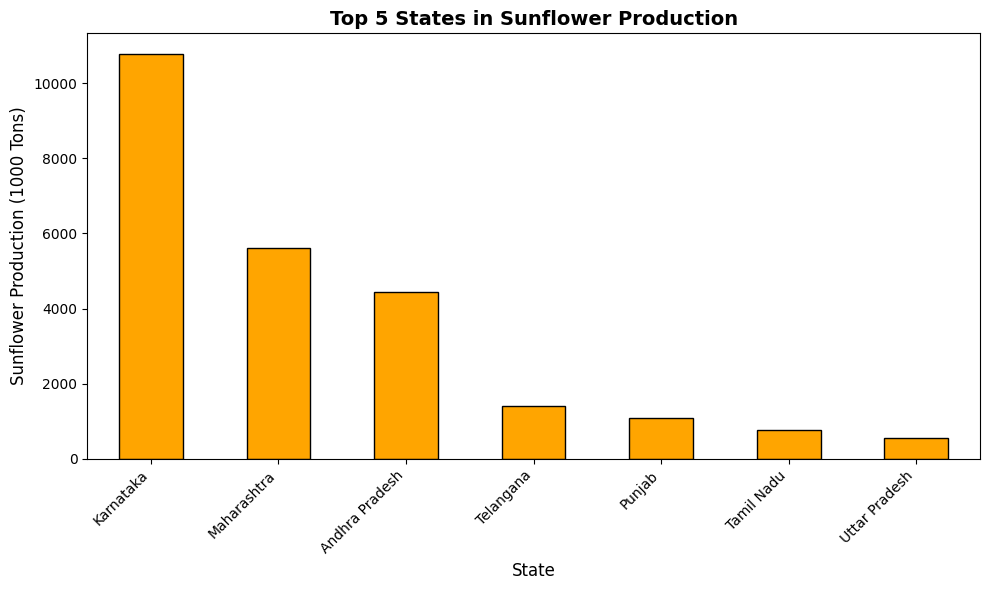

In [53]:
Sunflower_production = (df.groupby("State_Name")["Sunflower_Production_1000_Tons"]
.sum()
.sort_values(ascending=False)
.head(7))

# Plot bar chart
plt.figure(figsize=(10,6))
Sunflower_production.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 5 States in Sunflower Production", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Sunflower Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

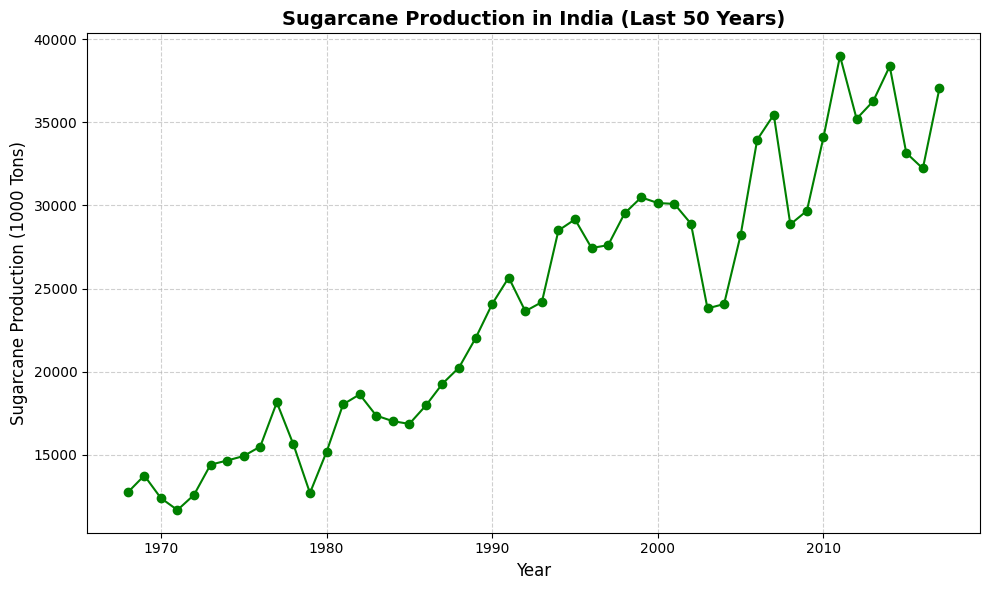

In [ ]:
# Plotting sugarcane production in India for the last 50 years

latest_year = df["Year"].max()
start_year = latest_year - 49

sugarcane = (
    df[df["Year"].between(start_year, latest_year)]
    .groupby("Year")["Sugarcane_Production_1000_Tons"]
    .sum()
)

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(sugarcane.index, sugarcane.values, marker="o", linestyle="-", color="green")

plt.title("Sugarcane Production in India (Last 50 Years)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sugarcane Production (1000 Tons)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


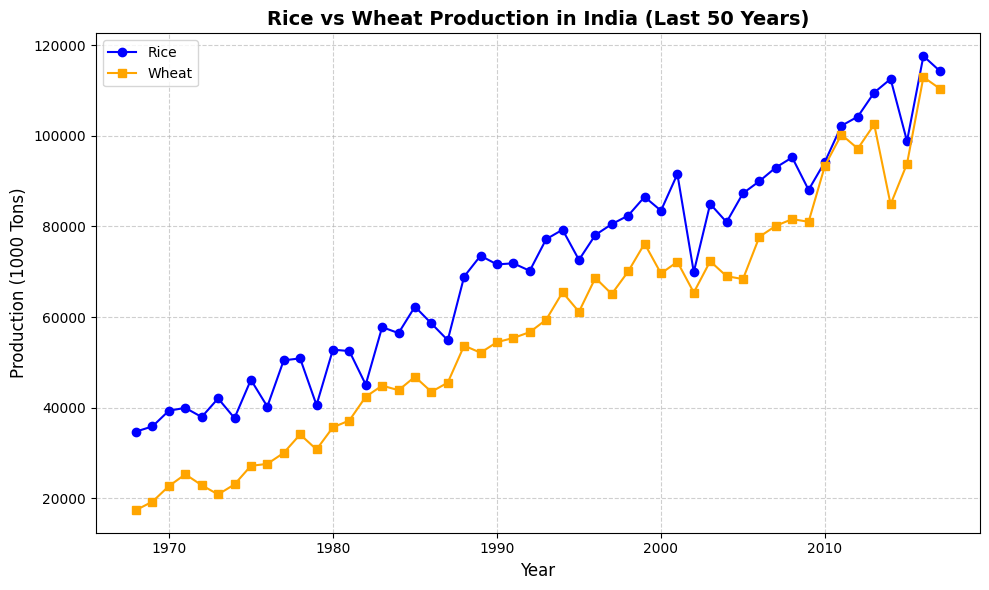

In [55]:
# Plotting Rice vs Wheat production in India for the last 50 years

rice_wheat = (
    df[df["Year"].between(start_year, latest_year)]
    .groupby("Year")[["Rice_Production_1000_Tons", "Wheat_Production_1000_Tons"]]
    .sum()
)

# Plot line chart for Rice vs Wheat
plt.figure(figsize=(10,6))
plt.plot(rice_wheat.index, rice_wheat["Rice_Production_1000_Tons"], 
         marker="o", linestyle="-", label="Rice", color="blue")
plt.plot(rice_wheat.index, rice_wheat["Wheat_Production_1000_Tons"], 
         marker="s", linestyle="-", label="Wheat", color="orange")

plt.title("Rice vs Wheat Production in India (Last 50 Years)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production (1000 Tons)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df["Dist_Name"] = df["Dist_Name == West Bengal"]

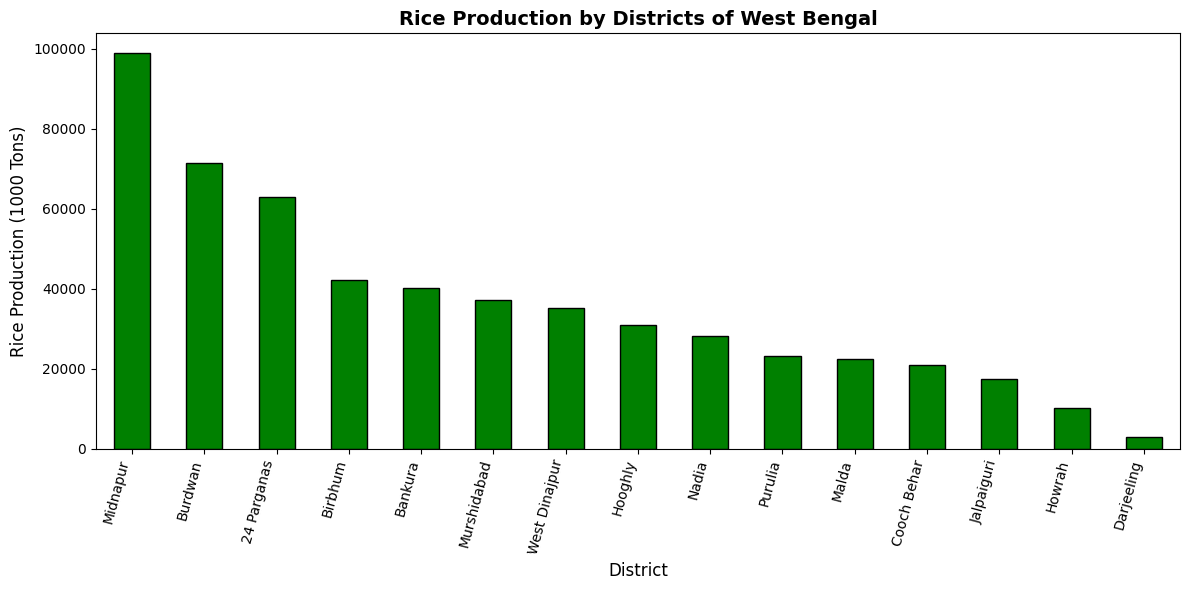

In [ ]:
# #rice production by west bengal district

# Filter data only for West Bengal
wb_rice = df[df["State_Name"] == "West Bengal"]

# Group by District and sum Rice Production across all years
wb_district_rice = (
    wb_rice.groupby("Dist_Name")["Rice_Production_1000_Tons"]
    .sum()
    .sort_values(ascending=False)
)

# Plot bar chart
plt.figure(figsize=(12,6))
wb_district_rice.plot(kind="bar", color="green", edgecolor="black")

plt.title("Rice Production by Districts of West Bengal", fontsize=14, fontweight="bold")
plt.xlabel("District", fontsize=12)
plt.ylabel("Rice Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


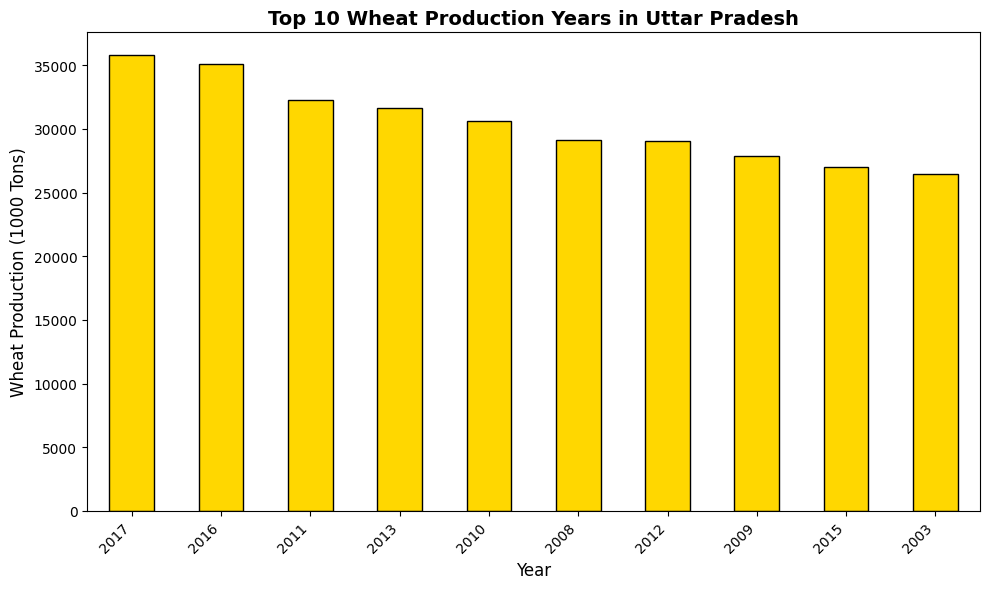

In [14]:
# top 10 Wheat production in Uttar Pradesh over the years
# Filter only Uttar Pradesh data
up_wheat = df[df["State_Name"] == "Uttar Pradesh"]

# Group by Year and sum Wheat Production
up_wheat_yearly = (
    up_wheat.groupby("Year")["Wheat_Production_1000_Tons"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot bar chart
plt.figure(figsize=(10,6))
up_wheat_yearly.plot(kind="bar", color="gold", edgecolor="black")

plt.title("Top 10 Wheat Production Years in Uttar Pradesh", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Wheat Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


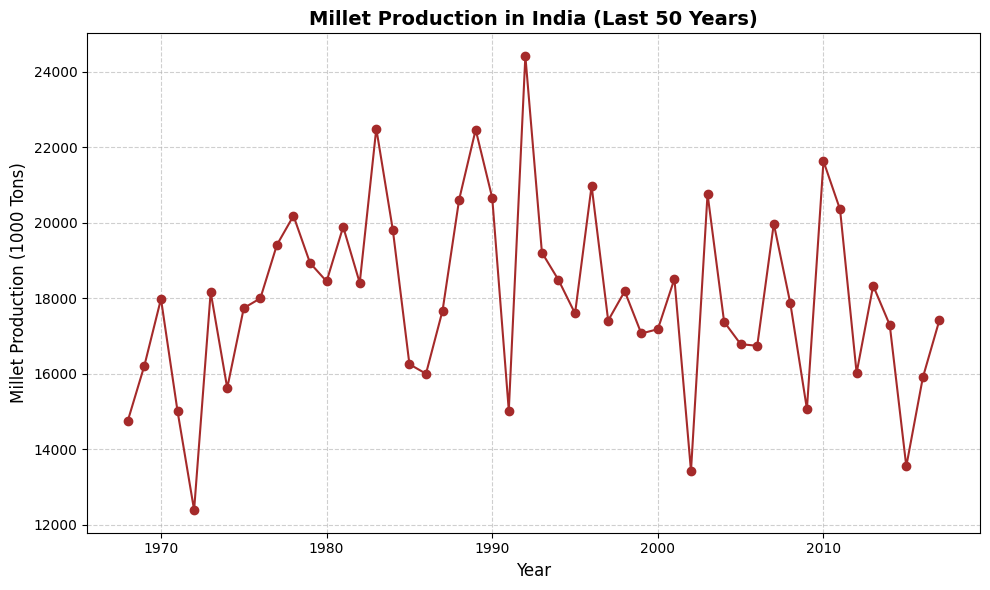

In [17]:

# Get the latest year and calculate start year for last 50 years
latest_year = df["Year"].max()
start_year = latest_year - 49

# Calculate total Millet Production (Pearl + Finger + Sorghum)
df["Total_Millet_Production_1000_Tons"] = (
    df["Pearl_Millet_Production_1000_Tons"].fillna(0) +
    df["Finger_Millet_Production_1000_Tons"].fillna(0) +
    df["Sorghum_Production_1000_Tons"].fillna(0)
)

# Aggregate Millet production year-wise (last 50 years)
millet = (
    df[df["Year"].between(start_year, latest_year)]
    .groupby("Year")["Total_Millet_Production_1000_Tons"]
    .sum()
)

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(millet.index, millet.values, marker="o", linestyle="-", color="brown")

plt.title("Millet Production in India (Last 50 Years)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Millet Production (1000 Tons)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



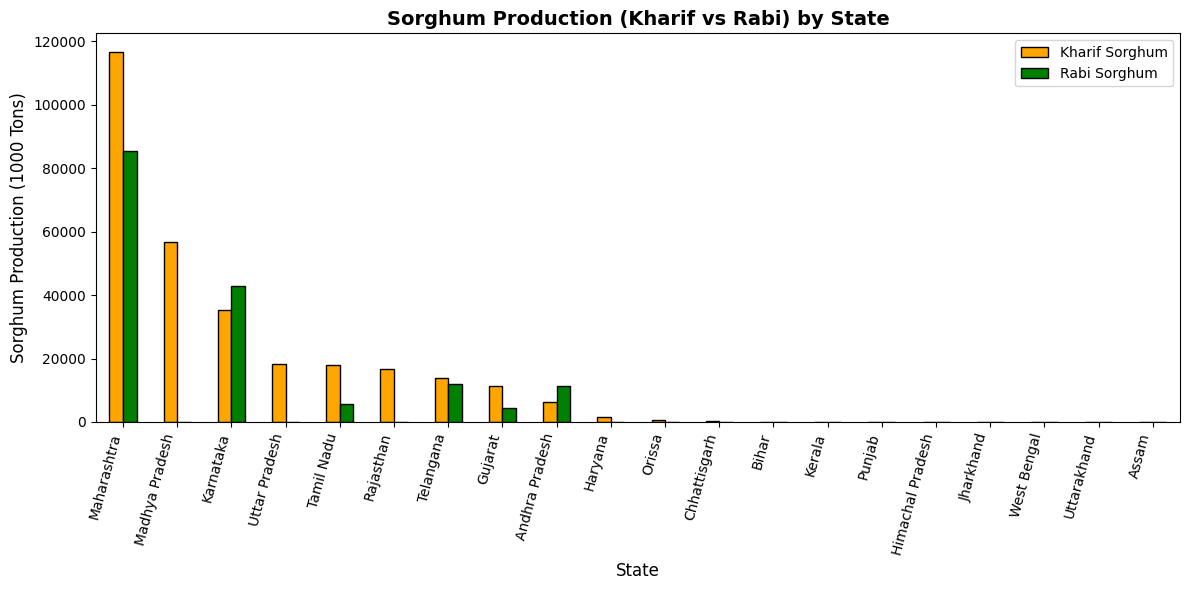

In [20]:

# Group by State and sum Kharif & Rabi Sorghum Production
sorghum_region = (
    df.groupby("State_Name")[["Kharif_Sorghum_Production_1000_Tons", 
                               "Rabi_Sorghum_Production_1000_Tons"]]
    .sum()
    .sort_values(by="Kharif_Sorghum_Production_1000_Tons", ascending=False)
)

# Plot side-by-side bar chart
sorghum_region.plot(kind="bar", figsize=(12,6), color=["orange", "green"], edgecolor="black")

plt.title("Sorghum Production (Kharif vs Rabi) by State", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Sorghum Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=75, ha="right")
plt.legend(["Kharif Sorghum", "Rabi Sorghum"])
plt.tight_layout()
plt.show()


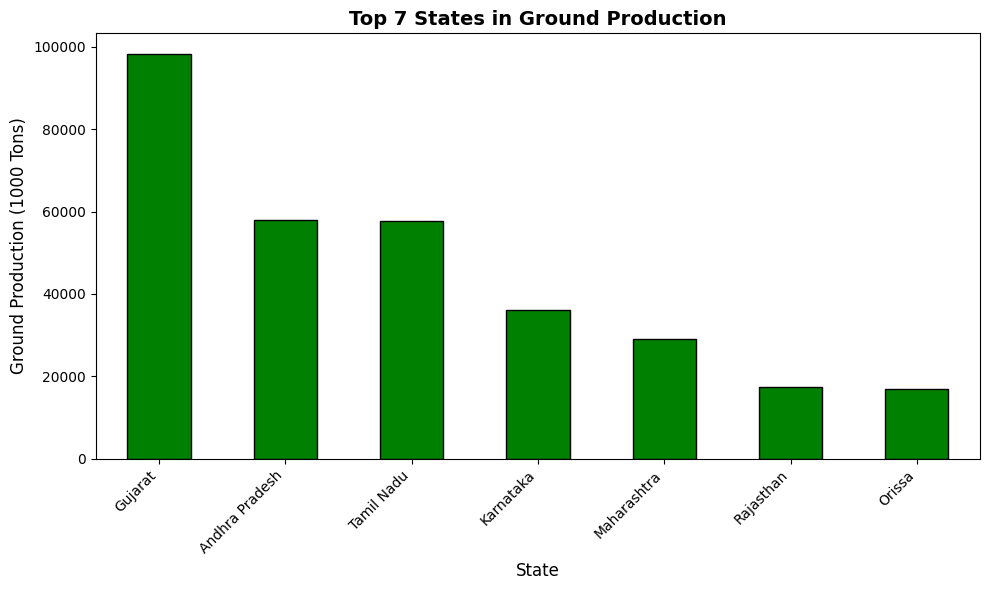

In [22]:
#top 7 groundnut production states

Groundnut_production = (df.groupby("State_Name")["Groundnut_Production_1000_Tons"]
.sum()
.sort_values(ascending=False)
.head(7))

# Plot bar chart
plt.figure(figsize=(10,6))
Groundnut_production.plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 7 States in Ground Production", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Ground Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

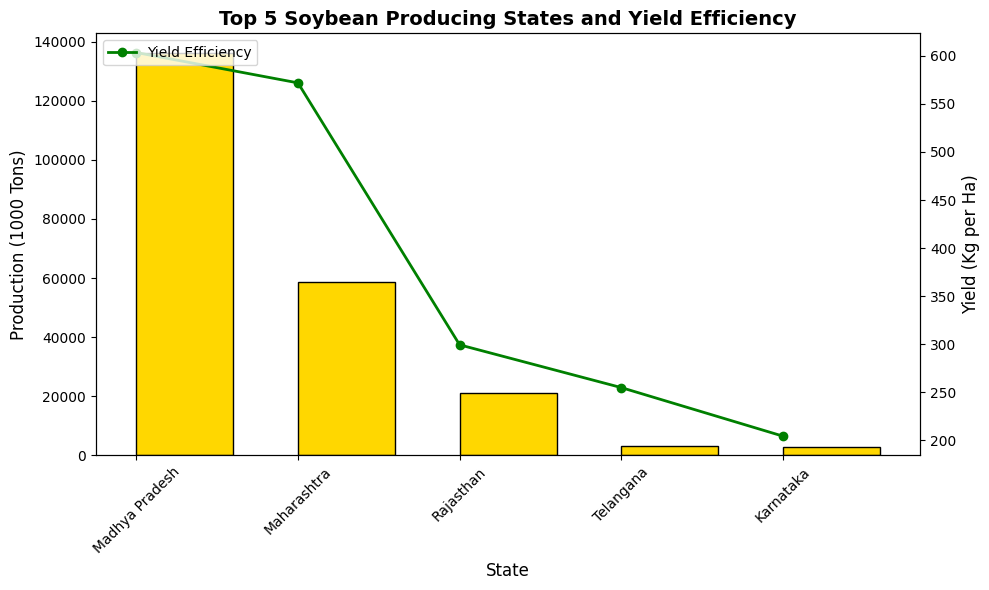

In [23]:
# Group by State: Sum production and area, take mean yield
soybean_state = (
    df.groupby("State_Name")[["Soyabean_Production_1000_Tons", 
                               "Soyabean_Area_1000_Ha", 
                               "Soyabean_Yield_Kg_Per_Ha"]]
    .agg({
        "Soyabean_Production_1000_Tons": "sum",
        "Soyabean_Area_1000_Ha": "sum",
        "Soyabean_Yield_Kg_Per_Ha": "mean"
    })
    .sort_values(by="Soyabean_Production_1000_Tons", ascending=False)
    .head(5)
)

# Plot production (bar) and yield (line) together
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for Production
soybean_state["Soyabean_Production_1000_Tons"].plot(
    kind="bar", ax=ax1, color="gold", edgecolor="black", position=0, width=0.6
)
ax1.set_ylabel("Production (1000 Tons)", fontsize=12)
ax1.set_xlabel("State", fontsize=12)

# Line chart for Yield
ax2 = ax1.twinx()
ax2.plot(
    soybean_state.index, 
    soybean_state["Soyabean_Yield_Kg_Per_Ha"], 
    marker="o", color="green", linewidth=2, label="Yield Efficiency"
)
ax2.set_ylabel("Yield (Kg per Ha)", fontsize=12)

# Title and legend
plt.title("Top 5 Soybean Producing States and Yield Efficiency", fontsize=14, fontweight="bold")
ax1.tick_params(axis="x", rotation=45)
ax2.legend(loc="upper left")
plt.tight_layout()
plt.show()


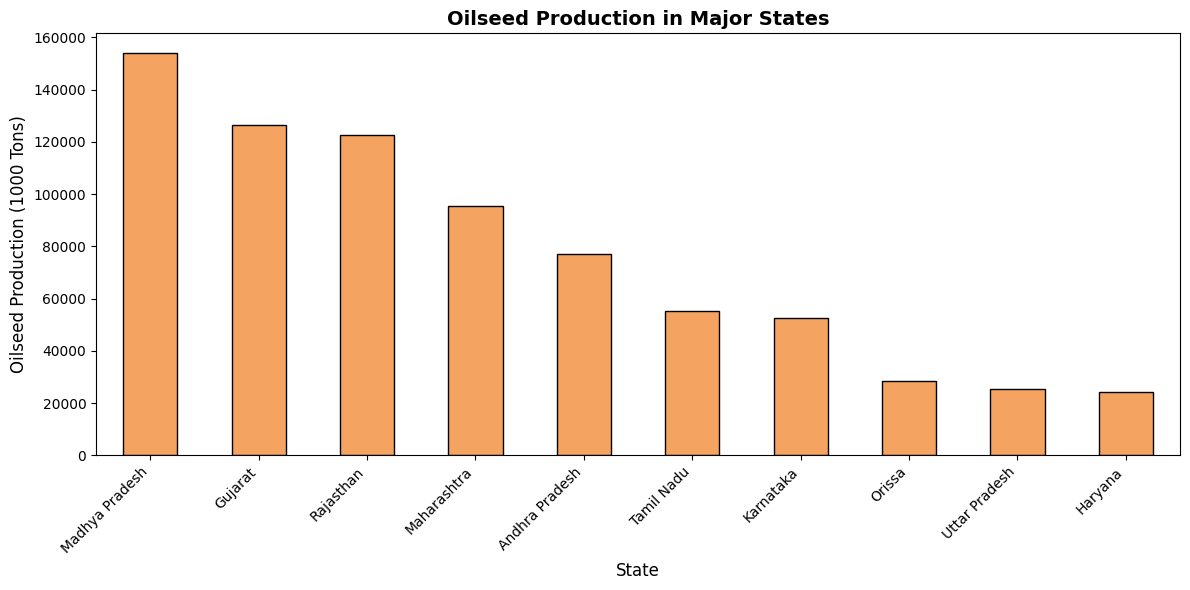

In [24]:
# Group by State and sum Oilseed Production
oilseed_state = (
    df.groupby("State_Name")["Oilseeds_Production_1000_Tons"]
    .sum()
    .sort_values(ascending=False)
)

# Select Top 10 Major States
top_oilseed_states = oilseed_state.head(10)

# Plot bar chart
plt.figure(figsize=(12,6))
top_oilseed_states.plot(kind="bar", color="sandybrown", edgecolor="black")

plt.title("Oilseed Production in Major States", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Oilseed Production (1000 Tons)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


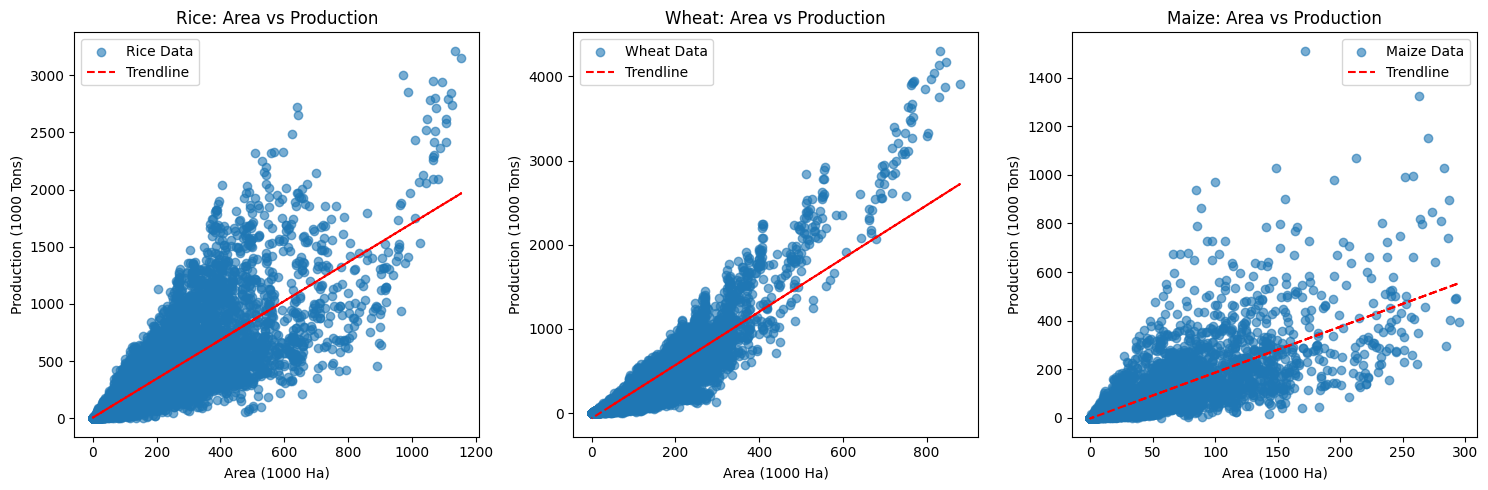

In [26]:
# Define crops and their respective columns
crops = {
    "Rice":  ("Rice_Area_1000_Ha",  "Rice_Production_1000_Tons"),
    "Wheat": ("Wheat_Area_1000_Ha", "Wheat_Production_1000_Tons"),
    "Maize": ("Maize_Area_1000_Ha", "Maize_Production_1000_Tons"),
}

plt.figure(figsize=(15,5))

for i, (crop, (area_col, prod_col)) in enumerate(crops.items(), 1):
    plt.subplot(1, 3, i)
    
    # Scatter plot
    plt.scatter(df[area_col], df[prod_col], alpha=0.6, label=f"{crop} Data")
    
    # Fit linear regression line
    z = np.polyfit(df[area_col].fillna(0), df[prod_col].fillna(0), 1)
    p = np.poly1d(z)
    plt.plot(df[area_col], p(df[area_col]), "r--", label="Trendline")
    
    plt.title(f"{crop}: Area vs Production")
    plt.xlabel("Area (1000 Ha)")
    plt.ylabel("Production (1000 Tons)")
    plt.legend()

plt.tight_layout()
plt.show()


c:\Users\vigne\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\vigne\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


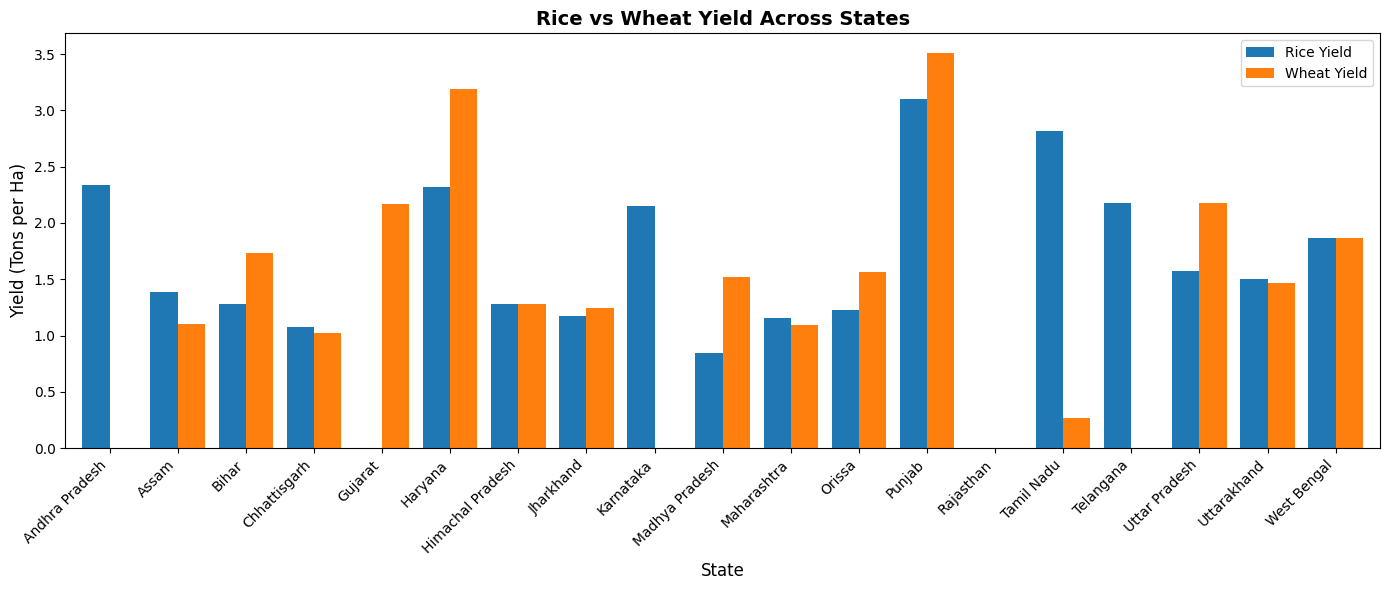

In [29]:
# Compute yield for Rice and Wheat
df["Rice_Yield"] = df["Rice_Production_1000_Tons"] / df["Rice_Area_1000_Ha"]
df["Wheat_Yield"] = df["Wheat_Production_1000_Tons"] / df["Wheat_Area_1000_Ha"]

# Group by State and take average yield
state_yield = df.groupby("State_Name")[["Rice_Yield", "Wheat_Yield"]].mean().dropna()

# Plot comparison (side-by-side bar chart)
state_yield.plot(kind="bar", figsize=(14,6), width=0.8)

plt.title("Rice vs Wheat Yield Across States", fontsize=14, fontweight="bold")
plt.xlabel("State", fontsize=12)
plt.ylabel("Yield (Tons per Ha)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(["Rice Yield", "Wheat Yield"])
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import plotly.express as px

# Compute yield for Rice and Wheat
df["Rice_Yield"] = df["Rice_Production_1000_Tons"] / df["Rice_Area_1000_Ha"]
df["Wheat_Yield"] = df["Wheat_Production_1000_Tons"] / df["Wheat_Area_1000_Ha"]

# Group by state and calculate average yield
state_yield = df.groupby("State_Name")[["Rice_Yield", "Wheat_Yield"]].mean().reset_index()

# Scatter plot with Plotly
fig = px.scatter(
    state_yield,
    x="Rice_Yield",
    y="Wheat_Yield",
    text="State_Name",   # show state labels
    size_max=10,
    title="Rice vs Wheat Yield Across States",
    labels={"Rice_Yield": "Rice Yield (Tons/Ha)", "Wheat_Yield": "Wheat Yield (Tons/Ha)"}
)

# Improve layout
fig.update_traces(textposition="top center", marker=dict(size=12, color="blue"))
fig.update_layout(width=800, height=600)

fig.show()

